# 5월 RF 분석

In [1]:
import pandas as pd
raw_hourly_df = pd.read_csv("sj_hourly_rainfall_case1.csv")
raw_hourly_df.head()

,date,4001430,4001440,4001450,4003420,4007450,4007470,4007472,4007474,4009460,...,4001450_gpm,4003420_gpm,4007450_gpm,4007470_gpm,4007472_gpm,4007474_gpm,4009460_gpm,9000140_gpm,9000233_gpm,9000234_gpm
0,2014-10-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2014-10-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2014-10-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2014-10-01 04:00:00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2014-10-01 05:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
raw_hourly_df['month'] = pd.DatetimeIndex(raw_hourly_df['date']).month_name()
raw_hourly_df.head()

,date,4001430,4001440,4001450,4003420,4007450,4007470,4007472,4007474,4009460,...,4003420_gpm,4007450_gpm,4007470_gpm,4007472_gpm,4007474_gpm,4009460_gpm,9000140_gpm,9000233_gpm,9000234_gpm,month
0,2014-10-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,October
1,2014-10-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,October
2,2014-10-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,October
3,2014-10-01 04:00:00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,October
4,2014-10-01 05:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,October


In [3]:
#raw_hourly_df = raw_hourly_df.loc[raw_hourly_df['month'] == "January"]
#raw_hourly_df = raw_hourly_df.loc[raw_hourly_df['month'] == "February"]
#raw_hourly_df = raw_hourly_df.loc[raw_hourly_df['month'] == "March"]
#raw_hourly_df = raw_hourly_df.loc[raw_hourly_df['month'] == "April"]
raw_hourly_df = raw_hourly_df.loc[raw_hourly_df['month'] == "May"]
#raw_hourly_df = raw_hourly_df.loc[raw_hourly_df['month'] == "June"]
#raw_hourly_df = raw_hourly_df.loc[raw_hourly_df['month'] == "July"]
#raw_hourly_df = raw_hourly_df.loc[raw_hourly_df['month'] == "August"]
#raw_hourly_df = raw_hourly_df.loc[raw_hourly_df['month'] == "September"]
#raw_hourly_df = raw_hourly_df.loc[raw_hourly_df['month'] == "October"]
#raw_hourly_df = raw_hourly_df.loc[raw_hourly_df['month'] == "November"]
#raw_hourly_df = raw_hourly_df.loc[raw_hourly_df['month'] == "December"]

## 1. 4001430 Station Random Forest 분석

In [4]:
st_code = "4001430"
x_col = st_code + "_gpm"
y_col = st_code

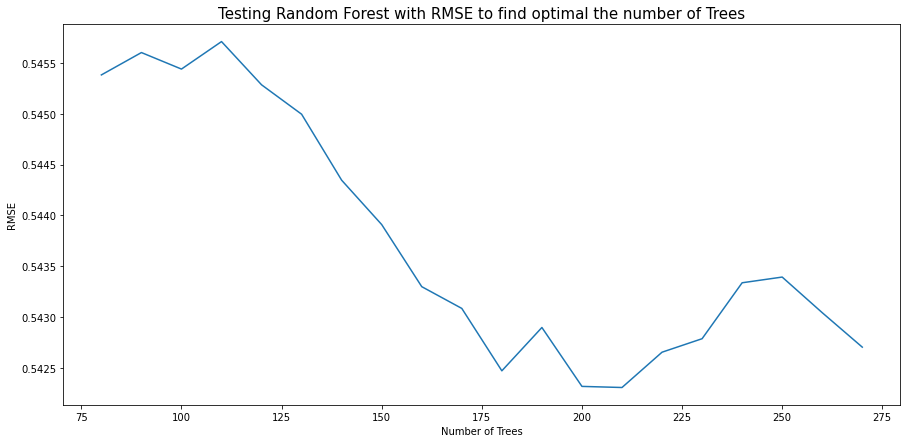

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

rmse_scores = []
estimators = []
X_val = raw_hourly_df[[x_col]]
y_val = raw_hourly_df[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)

rf = RandomForestRegressor(warm_start=True, random_state=2, n_jobs=-1)

est = 80

for i in range(20):
    rf.set_params(n_estimators=est)
    rf.fit(X, y)
    rmse = mean_squared_error(y_test, rf.predict(X_test), squared=False)
    
    rmse_scores.append(rmse)
    estimators.append(est)
    
    est += 10
    
plt.figure(figsize=(15, 7))
plt.plot(estimators, rmse_scores)

plt.xlabel("Number of Trees")
plt.ylabel("RMSE")

plt.title("Testing Random Forest with RMSE to find optimal the number of Trees", fontsize="15")
plt.show()

### Case-1 적용 RF

In [6]:
est_jan=200
cv_num = 20

rf = RandomForestRegressor(n_estimators=est_jan, random_state=2, n_jobs=-1)
X = raw_hourly_df[[x_col]]
y = raw_hourly_df[y_col]

In [7]:
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([-0.10444169, -0.12791357, -0.0422408 , -0.30109622, -0.46856154,
       -0.21517453, -0.28955364, -0.01402337, -0.62386912, -0.68576352,
       -0.25549815, -0.00193811, -0.17654456, -0.38339084, -0.21901916,
       -0.99230542, -0.01348912, -0.19076038, -1.47778509, -1.02956532])

In [8]:
rmse_case1 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case1, 3))
print('RMSE 평균: %0.3f' % (rmse_case1.mean()))

RMSE: [0.323 0.358 0.206 0.549 0.685 0.464 0.538 0.118 0.79  0.828 0.505 0.044
 0.42  0.619 0.468 0.996 0.116 0.437 1.216 1.015]
RMSE 평균: 0.535


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize 
from scipy.stats import gaussian_kde
from scipy.interpolate import interpn
from scipy import stats
from sklearn import linear_model

def density_scatter(x , y, st, bins=20, **kwargs )   :
    """
    Scatter plot colored by 2d histogram
    """
    fig = plt.figure(figsize=(11, 8))
    ax = fig.add_subplot(111)
    data, x_e, y_e = np.histogram2d(x, y, bins = bins, density = True )
    z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , data , np.vstack([x,y]).T , method = "splinef2d", bounds_error = False)

    #To be sure to plot all data
    z[np.where(np.isnan(z))] = 0.0

    idx = z.argsort()
    x, y, z = x[idx], y[idx], z[idx]

    ax.scatter(x, y, c=z, **kwargs )
    norm = Normalize(vmin = np.min(z), vmax = np.max(z))
    cbar = fig.colorbar(cm.ScalarMappable(norm = norm), ax=ax)
    cbar.ax.set_ylabel('Density', fontsize=18)
    cbar.ax.tick_params(labelsize=18) 
    ax.set_title('Ground Rainfall Prediction \n using IMERG in the Station: %i' %st , fontsize=18)
    ax.set_xlabel('Prediction (mm/h)', fontsize=18)
    ax.set_ylabel('Station Observation (mm/h)', fontsize=18)
    xt = [0, 2, 4, 6, 8, 10, 12, 14]
    ax.set_xlim([0, 15])
    ax.set_ylim([0, 15])
    ax.set_xticklabels(xt, fontsize=18)
    ax.set_yticklabels(xt, fontsize=18)

    x_pred = np.linspace(0, 20, 2)            
    x_pred = x_pred.reshape(-1, 1)  
    y_pred = model.predict(x_pred)

    ax.plot(x_pred, y_pred, color='k')
    ax.text(0.55, 0.2, '$y = %.2f x_1 - %.2f $' % (model.coef_[0], abs(model.intercept_)), fontsize=17, transform=ax.transAxes)

/tmp/ipykernel_12096/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_12096/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


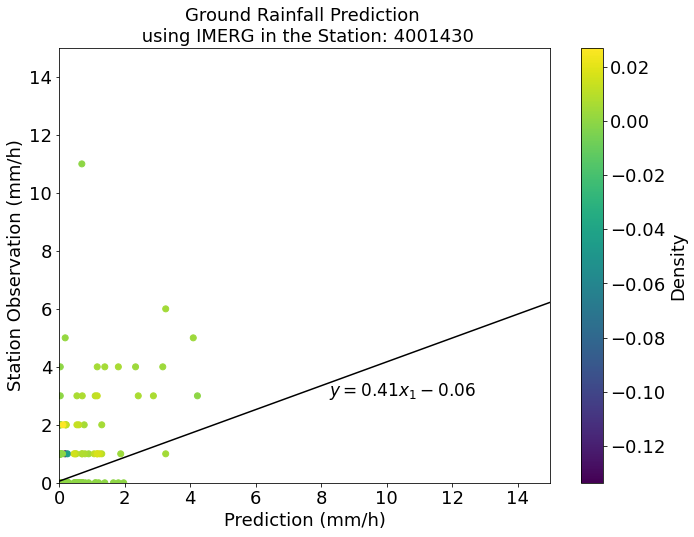

In [10]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

### Case-2 적용 RF

In [11]:
raw_hourly_df_new = raw_hourly_df[raw_hourly_df[y_col].loc[:]!=0].dropna()
zero_count = (len(raw_hourly_df) - len(raw_hourly_df_new))/len(raw_hourly_df)*100
X_val = raw_hourly_df_new[[x_col]]
y_val = raw_hourly_df_new[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)

scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([ -3.17367692, -13.59039347,  -2.4204719 ,  -4.18637594,
        -3.79693955,  -6.09007562,  -1.3566177 ,  -2.267251  ,
        -1.21133285,  -2.97352969,  -6.22233036,  -1.2384305 ,
        -1.34980401,  -5.00762098,  -9.09342073,  -0.82017505,
        -3.37037263,  -1.44962705, -20.00419675,  -0.54977501])

In [12]:
rmse_case2 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case2, 3))
print('RMSE 평균: %0.3f' % (rmse_case2.mean()))
print('제거된 0의 비율: %0.3f' % (zero_count))

RMSE: [1.781 3.687 1.556 2.046 1.949 2.468 1.165 1.506 1.101 1.724 2.494 1.113
 1.162 2.238 3.016 0.906 1.836 1.204 4.473 0.741]
RMSE 평균: 1.908
제거된 0의 비율: 95.219


/tmp/ipykernel_12096/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_12096/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


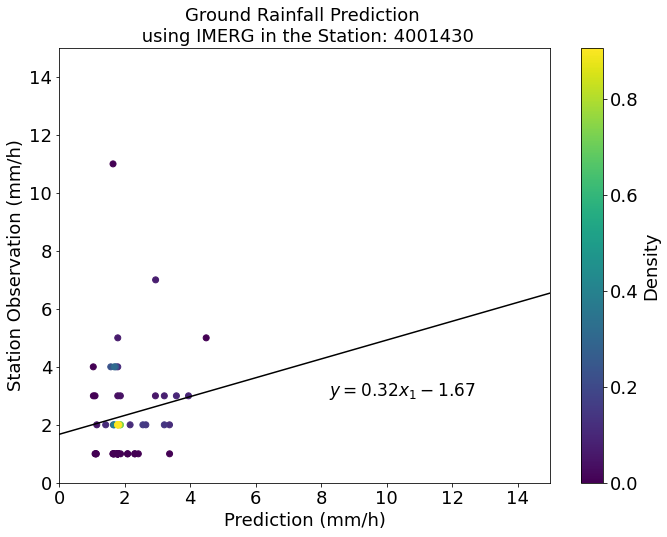

In [13]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

In [14]:
rmse_case1_all = []
rmse_case2_all = []
zero_count_ratio = []
rmse_case1_all.append(rmse_case1.mean())
rmse_case2_all.append(rmse_case2.mean())
zero_count_ratio.append(zero_count)

## 2. 4001440 Station Random Forest 분석

### Case-1 적용 RF

In [15]:
st_code = "4001440"
x_col = st_code + "_gpm"
y_col = st_code

In [16]:
rf = RandomForestRegressor(n_estimators=est_jan, random_state=2, n_jobs=-1)
X_val = raw_hourly_df[[x_col]]
y_val = raw_hourly_df[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)

scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([-0.08283283, -0.20722373, -0.30036909, -0.1652978 , -0.09843882,
       -0.83209611, -0.25017932, -0.26384704, -0.44032279, -0.12461562,
       -0.09367066, -0.07225257, -1.31393035, -0.17503843, -0.33551255,
       -0.13845129, -0.23118141, -0.31028704, -0.5784651 , -0.29801946])

In [17]:
rmse_case1 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case1, 3))
print('RMSE 평균: %0.3f' % (rmse_case1.mean()))

RMSE: [0.288 0.455 0.548 0.407 0.314 0.912 0.5   0.514 0.664 0.353 0.306 0.269
 1.146 0.418 0.579 0.372 0.481 0.557 0.761 0.546]
RMSE 평균: 0.519


/tmp/ipykernel_12096/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_12096/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


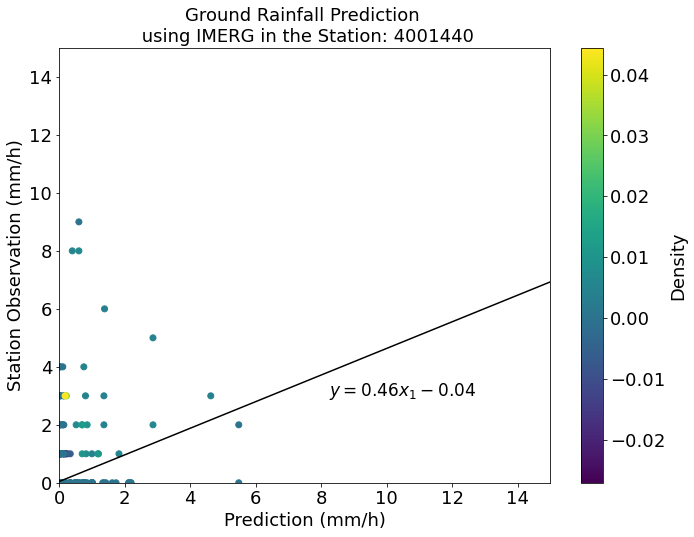

In [18]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

### Case-2 적용 RF

In [19]:
raw_hourly_df_new = raw_hourly_df[raw_hourly_df[y_col].loc[:]!=0].dropna()
zero_count = (len(raw_hourly_df) - len(raw_hourly_df_new))/len(raw_hourly_df)*100
X_val = raw_hourly_df_new[[x_col]]
y_val = raw_hourly_df_new[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)

scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([ -1.47062378,  -4.36158372,  -0.87330375,  -2.48851725,
        -1.55502561,  -1.79466335,  -1.71086551,  -1.40374925,
       -13.33918706,  -1.45167515,  -5.11788747,  -0.7567093 ,
        -1.44266588, -22.82714358,  -1.14707853,  -0.73669725,
        -6.09975979,  -1.72560437,  -1.34885489,  -0.5876771 ])

In [20]:
rmse_case2 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case2, 3))
print('RMSE 평균: %0.3f' % (rmse_case2.mean()))
print('제거된 0의 비율: %0.3f' % (zero_count))

RMSE: [1.213 2.088 0.935 1.578 1.247 1.34  1.308 1.185 3.652 1.205 2.262 0.87
 1.201 4.778 1.071 0.858 2.47  1.314 1.161 0.767]
RMSE 평균: 1.625
제거된 0의 비율: 94.988


/tmp/ipykernel_12096/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_12096/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


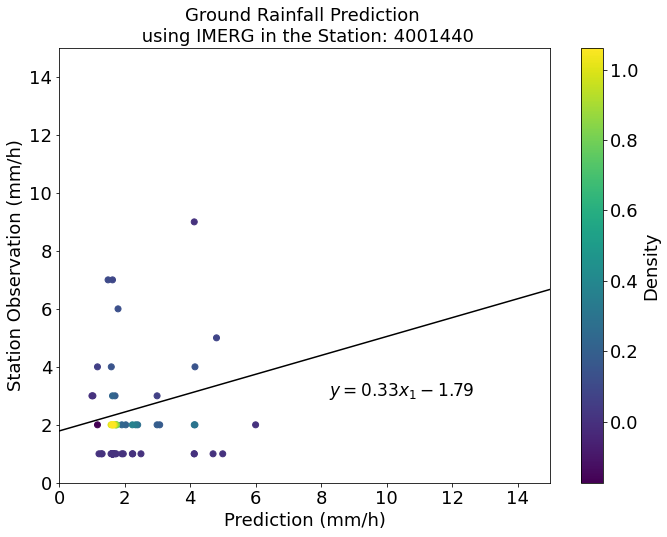

In [21]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

In [22]:
rmse_case1_all.append(rmse_case1.mean())
rmse_case2_all.append(rmse_case2.mean())
zero_count_ratio.append(zero_count)

## 3. 4001450 Station Random Forest 분석

### Case-1 적용 RF

In [23]:
st_code = "4001450"
x_col = st_code + "_gpm"
y_col = st_code

In [24]:
rf = RandomForestRegressor(n_estimators=est_jan, random_state=2, n_jobs=-1)
X_val = raw_hourly_df[[x_col]]
y_val = raw_hourly_df[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([-0.2479086 , -0.30373507, -0.28913059, -2.31005336, -0.09194656,
       -0.13170709, -0.55324291, -0.41206574, -0.63868331, -0.27351014,
       -0.29605938, -0.13557369, -1.38623628, -0.25778743, -0.70836801,
       -0.76175554, -0.88648457, -0.21103128, -0.840827  , -1.42650131])

In [25]:
rmse_case1 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case1, 3))
print('RMSE 평균: %0.3f' % (rmse_case1.mean()))

RMSE: [0.498 0.551 0.538 1.52  0.303 0.363 0.744 0.642 0.799 0.523 0.544 0.368
 1.177 0.508 0.842 0.873 0.942 0.459 0.917 1.194]
RMSE 평균: 0.715


/tmp/ipykernel_12096/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_12096/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


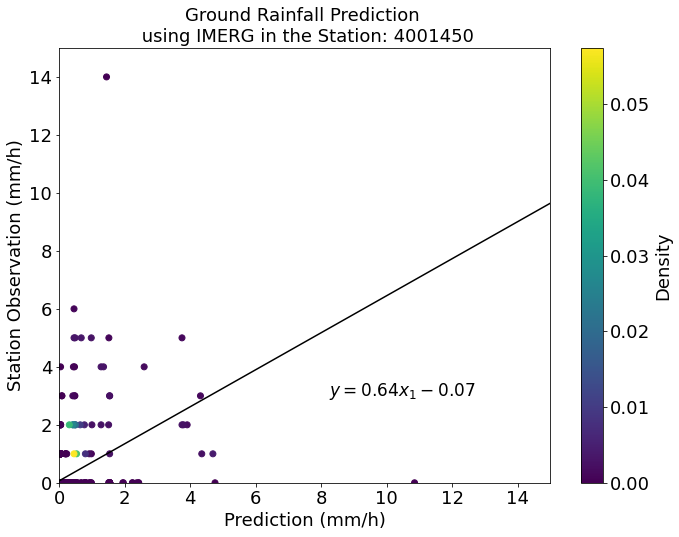

In [26]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

### Case-2 적용 RF

In [27]:
raw_hourly_df_new = raw_hourly_df[raw_hourly_df[y_col].loc[:]!=0].dropna()
zero_count = (len(raw_hourly_df) - len(raw_hourly_df_new))/len(raw_hourly_df)*100
X_val = raw_hourly_df_new[[x_col]]
y_val = raw_hourly_df_new[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([ -2.93493766,  -3.67764843,  -7.71875715,  -9.50625054,
       -20.64256828, -14.28457651,  -7.00434189,  -8.24364548,
        -3.23276654,  -2.79019322, -16.80825314,  -1.54658086,
        -1.318356  ,  -1.50126311, -34.53742985,  -1.93854797,
        -4.03098904,  -4.51681137, -11.18190013,  -2.86102012])

In [28]:
rmse_case2 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case2, 3))
print('RMSE 평균: %0.3f' % (rmse_case2.mean()))
print('제거된 0의 비율: %0.3f' % (zero_count))

RMSE: [1.713 1.918 2.778 3.083 4.543 3.779 2.647 2.871 1.798 1.67  4.1   1.244
 1.148 1.225 5.877 1.392 2.008 2.125 3.344 1.691]
RMSE 평균: 2.548
제거된 0의 비율: 94.604


/tmp/ipykernel_12096/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_12096/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


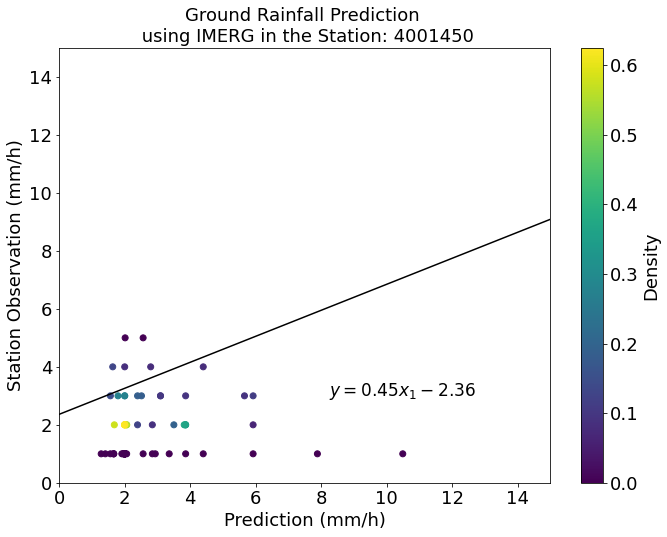

In [29]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

In [30]:
rmse_case1_all.append(rmse_case1.mean())
rmse_case2_all.append(rmse_case2.mean())
zero_count_ratio.append(zero_count)

## 4. 4003420 Station Random Forest 분석

### Case-1 적용 RF

In [31]:
st_code = "4003420"
x_col = st_code + "_gpm"
y_col = st_code

In [32]:
rf = RandomForestRegressor(n_estimators=est_jan, random_state=2, n_jobs=-1)
X_val = raw_hourly_df[[x_col]]
y_val = raw_hourly_df[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([-0.13449083, -0.25037162, -0.25975668, -0.25794107, -0.0628756 ,
       -0.13208561, -0.49090021, -0.12207086, -0.31389046, -0.13435218,
       -0.08155585, -0.08440973, -0.72118915, -0.19955679, -0.44275994,
       -0.12544456, -0.36332453, -0.18604596, -0.50980818, -0.62115927])

In [33]:
rmse_case1 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case1, 3))
print('RMSE 평균: %0.3f' % (rmse_case1.mean()))

RMSE: [0.367 0.5   0.51  0.508 0.251 0.363 0.701 0.349 0.56  0.367 0.286 0.291
 0.849 0.447 0.665 0.354 0.603 0.431 0.714 0.788]
RMSE 평균: 0.495


/tmp/ipykernel_12096/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_12096/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


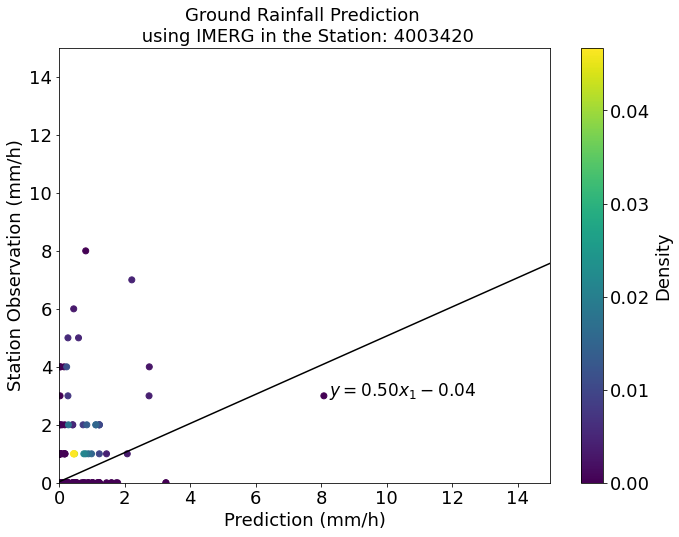

In [34]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

### Case-2 적용 RF

In [35]:
raw_hourly_df_new = raw_hourly_df[raw_hourly_df[y_col].loc[:]!=0].dropna()
zero_count = (len(raw_hourly_df) - len(raw_hourly_df_new))/len(raw_hourly_df)*100
X_val = raw_hourly_df_new[[x_col]]
y_val = raw_hourly_df_new[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([ -2.80242388,  -8.57619681,  -1.29424089,  -2.30162784,
        -3.4261948 ,  -1.31277978, -17.03071897,  -0.36629513,
        -2.10659277,  -2.17296762,  -1.14734404,  -6.0938568 ,
        -5.56200029,  -1.89523654,  -2.15918185,  -1.11399408,
        -3.34812861,  -2.19154175,  -0.92317793, -11.16565856])

In [36]:
rmse_case2 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case2, 3))
print('RMSE 평균: %0.3f' % (rmse_case2.mean()))
print('제거된 0의 비율: %0.3f' % (zero_count))

RMSE: [1.674 2.929 1.138 1.517 1.851 1.146 4.127 0.605 1.451 1.474 1.071 2.469
 2.358 1.377 1.469 1.055 1.83  1.48  0.961 3.342]
RMSE 평균: 1.766
제거된 0의 비율: 95.469


/tmp/ipykernel_12096/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_12096/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


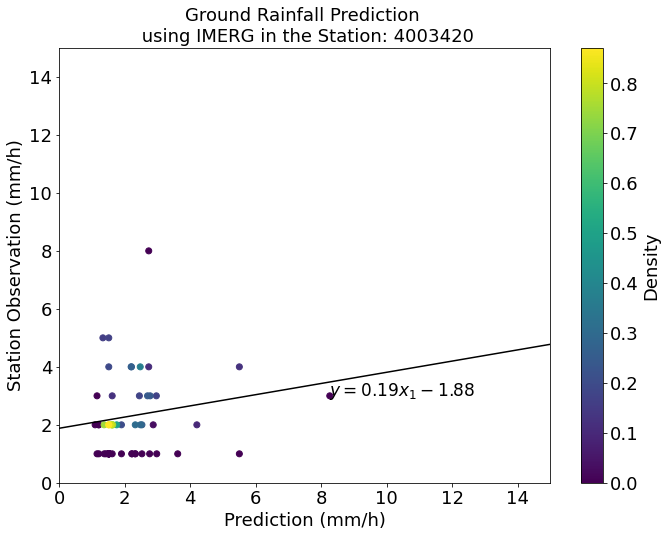

In [37]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

In [38]:
rmse_case1_all.append(rmse_case1.mean())
rmse_case2_all.append(rmse_case2.mean())
zero_count_ratio.append(zero_count)

## 5. 4007450 Station Random Forest 분석

### Case-1 적용 RF

In [39]:
st_code = "4007450"
x_col = st_code + "_gpm"
y_col = st_code

In [40]:
rf = RandomForestRegressor(n_estimators=est_jan, random_state=2, n_jobs=-1)
X_val = raw_hourly_df[[x_col]]
y_val = raw_hourly_df[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([-0.28762046, -0.97061703, -0.49699876, -0.46661008, -0.15945114,
       -0.27707396, -0.24418955, -0.20920373, -0.34143185, -0.63892481,
       -0.72826503, -0.81828087, -0.42227081, -0.6941205 , -0.72701928,
       -0.54538276, -0.73682256, -0.50344725, -0.7775608 , -0.26682166])

In [41]:
rmse_case1 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case1, 3))
print('RMSE 평균: %0.3f' % (rmse_case1.mean()))

RMSE: [0.536 0.985 0.705 0.683 0.399 0.526 0.494 0.457 0.584 0.799 0.853 0.905
 0.65  0.833 0.853 0.739 0.858 0.71  0.882 0.517]
RMSE 평균: 0.698


/tmp/ipykernel_12096/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_12096/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


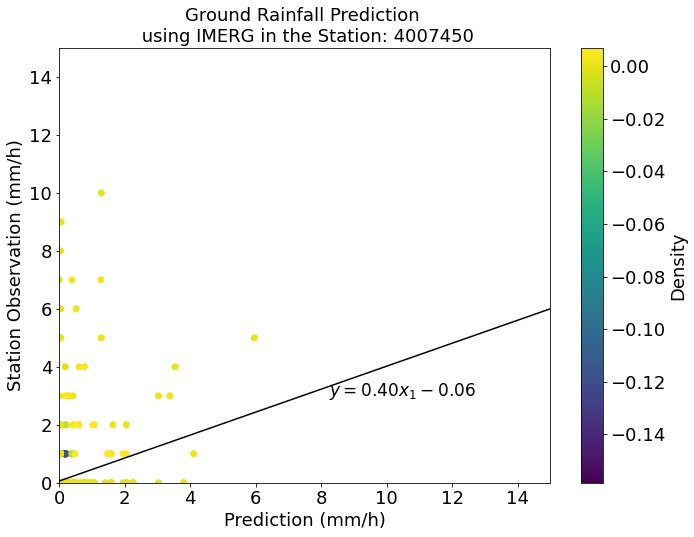

In [42]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

### Case-2 적용 RF

In [43]:
raw_hourly_df_new = raw_hourly_df[raw_hourly_df[y_col].loc[:]!=0].dropna()
zero_count = (len(raw_hourly_df) - len(raw_hourly_df_new))/len(raw_hourly_df)*100
X_val = raw_hourly_df_new[[x_col]]
y_val = raw_hourly_df_new[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([-5.53596708, -1.89243689, -5.96462876, -8.44114351, -7.14519378,
       -6.38627445, -4.33246039, -6.21304528, -5.48224213, -4.23107665,
       -3.26611687, -9.17439869, -1.77748307, -0.51212773, -6.11424315,
       -6.24897282, -6.63787774, -1.11817572, -5.54414278, -6.8547748 ])

In [44]:
rmse_case2 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case2, 3))
print('RMSE 평균: %0.3f' % (rmse_case2.mean()))
print('제거된 0의 비율: %0.3f' % (zero_count))

RMSE: [2.353 1.376 2.442 2.905 2.673 2.527 2.081 2.493 2.341 2.057 1.807 3.029
 1.333 0.716 2.473 2.5   2.576 1.057 2.355 2.618]
RMSE 평균: 2.186
제거된 0의 비율: 94.796


/tmp/ipykernel_12096/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_12096/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


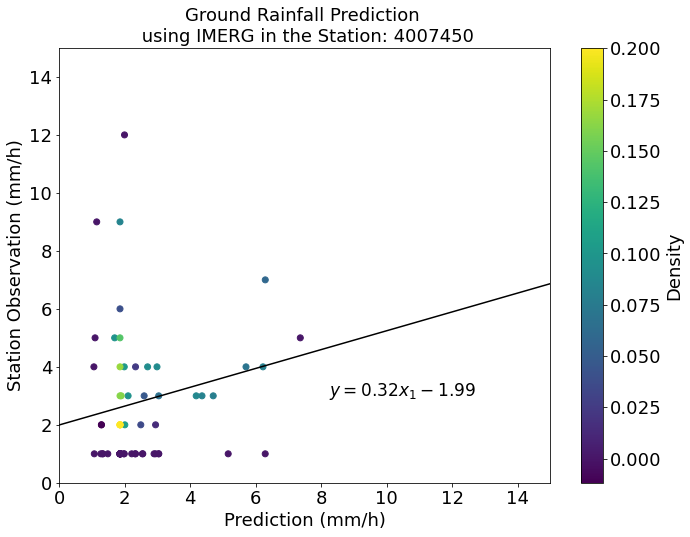

In [45]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

In [46]:
rmse_case1_all.append(rmse_case1.mean())
rmse_case2_all.append(rmse_case2.mean())
zero_count_ratio.append(zero_count)

## 6. 4007470 Station Random Forest 분석

### Case-1 적용 RF

In [47]:
st_code = "4007470"
x_col = st_code + "_gpm"
y_col = st_code

In [48]:
rf = RandomForestRegressor(n_estimators=est_jan, random_state=2, n_jobs=-1)
X_val = raw_hourly_df[[x_col]]
y_val = raw_hourly_df[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([-0.31547356, -0.29897712, -0.45569538, -0.51000218, -0.21648701,
       -0.18363538, -0.24923454, -0.40602521, -0.37957986, -0.42031502,
       -0.40452625, -1.14094705, -0.10380144, -0.31570921, -0.62783859,
       -0.21685486, -0.56101322, -0.98023241, -0.37234144, -0.70143018])

In [49]:
rmse_case1 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case1, 3))
print('RMSE 평균: %0.3f' % (rmse_case1.mean()))

RMSE: [0.562 0.547 0.675 0.714 0.465 0.429 0.499 0.637 0.616 0.648 0.636 1.068
 0.322 0.562 0.792 0.466 0.749 0.99  0.61  0.838]
RMSE 평균: 0.641


/tmp/ipykernel_12096/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_12096/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


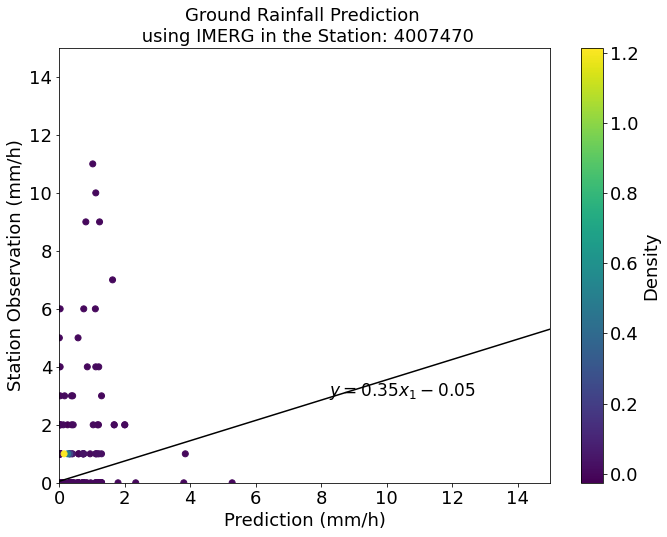

In [50]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

### Case-2 적용 RF

In [51]:
raw_hourly_df_new = raw_hourly_df[raw_hourly_df[y_col].loc[:]!=0].dropna()
zero_count = (len(raw_hourly_df) - len(raw_hourly_df_new))/len(raw_hourly_df)*100
X_val = raw_hourly_df_new[[x_col]]
y_val = raw_hourly_df_new[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([ -3.43067073,  -4.12145504,  -2.10773647, -45.8842101 ,
        -5.3735715 ,  -6.57822457,  -7.90756648,  -0.9922604 ,
        -3.86474686,  -5.01320158,  -7.57357117,  -0.7819059 ,
        -4.01971523,  -6.92057383,  -2.2593937 ,  -4.03953898,
        -1.62279667, -19.67659076, -17.99337841,  -3.54896144])

In [52]:
rmse_case2 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case2, 3))
print('RMSE 평균: %0.3f' % (rmse_case2.mean()))
print('제거된 0의 비율: %0.3f' % (zero_count))

RMSE: [1.852 2.03  1.452 6.774 2.318 2.565 2.812 0.996 1.966 2.239 2.752 0.884
 2.005 2.631 1.503 2.01  1.274 4.436 4.242 1.884]
RMSE 평균: 2.431
제거된 0의 비율: 95.123


/tmp/ipykernel_12096/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_12096/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


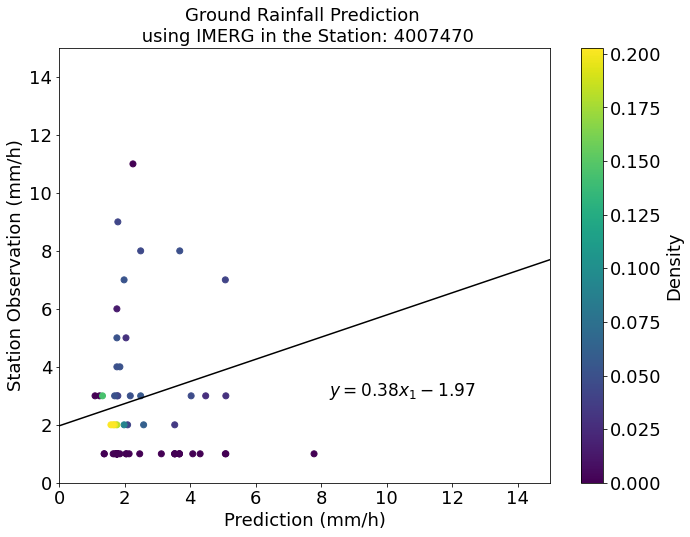

In [53]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

In [54]:
rmse_case1_all.append(rmse_case1.mean())
rmse_case2_all.append(rmse_case2.mean())
zero_count_ratio.append(zero_count)

## 7. 4007472 Station Random Forest 분석

### Case-1 적용 RF

In [55]:
st_code = "4007472"
x_col = st_code + "_gpm"
y_col = st_code

In [56]:
rf = RandomForestRegressor(n_estimators=est_jan, random_state=2, n_jobs=-1)
X_val = raw_hourly_df[[x_col]]
y_val = raw_hourly_df[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([-0.20519749, -0.47749153, -0.49522791, -0.33170042, -0.42616417,
       -0.36106803, -0.18864866, -0.38061949, -0.21276653, -0.40466633,
       -0.31688041, -0.7087482 , -0.26832039, -0.42190288, -0.55384496,
       -0.40535495, -0.45739374, -0.20650714, -0.50797087, -0.43462845])

In [57]:
rmse_case1 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case1, 3))
print('RMSE 평균: %0.3f' % (rmse_case1.mean()))

RMSE: [0.453 0.691 0.704 0.576 0.653 0.601 0.434 0.617 0.461 0.636 0.563 0.842
 0.518 0.65  0.744 0.637 0.676 0.454 0.713 0.659]
RMSE 평균: 0.614


/tmp/ipykernel_12096/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_12096/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


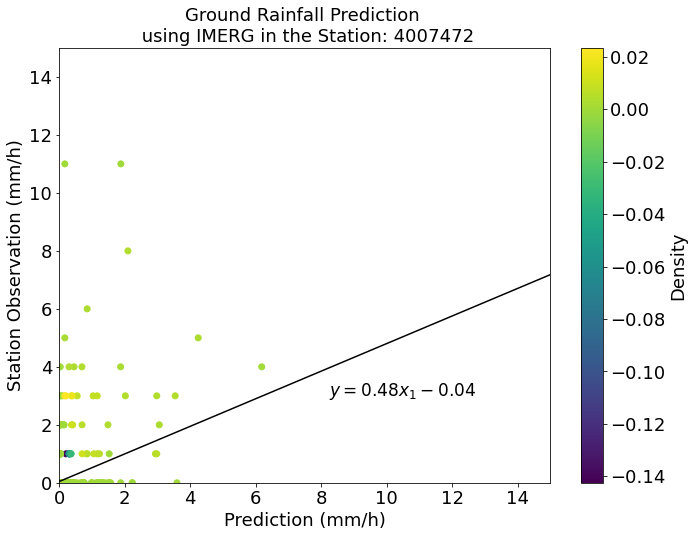

In [58]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

### Case-2 적용 RF

In [59]:
raw_hourly_df_new = raw_hourly_df[raw_hourly_df[y_col].loc[:]!=0].dropna()
zero_count = (len(raw_hourly_df) - len(raw_hourly_df_new))/len(raw_hourly_df)*100
X_val = raw_hourly_df_new[[x_col]]
y_val = raw_hourly_df_new[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([-6.49223939, -6.03343737, -1.98138115, -1.9669204 , -3.56600508,
       -8.11755118, -1.53373907, -3.33646874, -0.92257753, -3.05819126,
       -2.52784328, -4.76733451, -7.725954  , -8.88698443, -9.60514725,
       -0.62022678, -0.53176371, -1.40092061, -1.4091486 , -7.18025983])

In [60]:
rmse_case2 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case2, 3))
print('RMSE 평균: %0.3f' % (rmse_case2.mean()))
print('제거된 0의 비율: %0.3f' % (zero_count))

RMSE: [2.548 2.456 1.408 1.402 1.888 2.849 1.238 1.827 0.961 1.749 1.59  2.183
 2.78  2.981 3.099 0.788 0.729 1.184 1.187 2.68 ]
RMSE 평균: 1.876
제거된 0의 비율: 94.988


/tmp/ipykernel_12096/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_12096/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


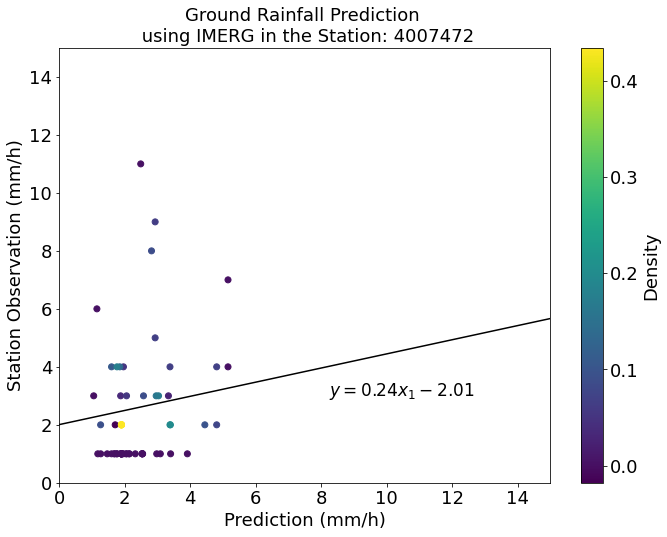

In [61]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

In [62]:
rmse_case1_all.append(rmse_case1.mean())
rmse_case2_all.append(rmse_case2.mean())
zero_count_ratio.append(zero_count)

## 8. 4007474 Station Random Forest 분석

### Case-1 적용 RF

In [63]:
st_code = "4007474"
x_col = st_code + "_gpm"
y_col = st_code

In [64]:
rf = RandomForestRegressor(n_estimators=est_jan, random_state=2, n_jobs=-1)
X_val = raw_hourly_df[[x_col]]
y_val = raw_hourly_df[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([-0.38207207, -0.77821558, -0.18240911, -2.88535212, -0.36045592,
       -0.91488413, -0.29489905, -0.45154197, -0.18319947, -0.29175772,
       -0.4862349 , -1.17241702, -0.39259171, -5.46500272, -0.3559118 ,
       -0.42710179, -0.68587511, -0.79667831, -0.66253847, -0.14296197])

In [65]:
rmse_case1 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case1, 3))
print('RMSE 평균: %0.3f' % (rmse_case1.mean()))

RMSE: [0.618 0.882 0.427 1.699 0.6   0.956 0.543 0.672 0.428 0.54  0.697 1.083
 0.627 2.338 0.597 0.654 0.828 0.893 0.814 0.378]
RMSE 평균: 0.814


/tmp/ipykernel_12096/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_12096/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


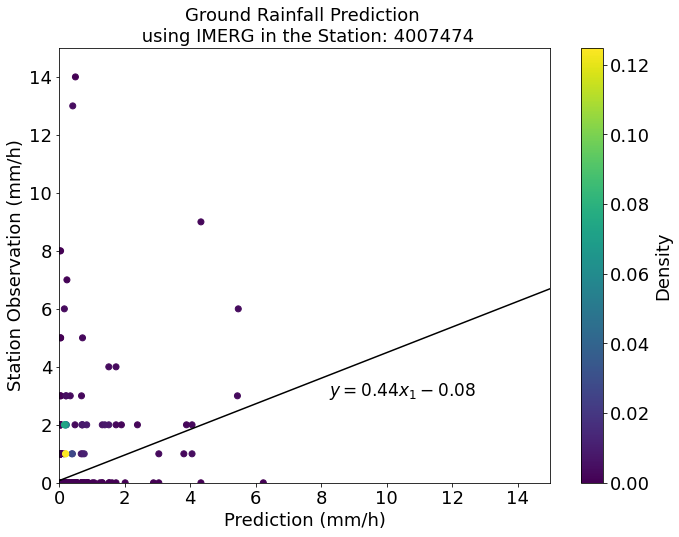

In [66]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

### Case-2 적용 RF

In [67]:
raw_hourly_df_new = raw_hourly_df[raw_hourly_df[y_col].loc[:]!=0].dropna()
zero_count = (len(raw_hourly_df) - len(raw_hourly_df_new))/len(raw_hourly_df)*100
X_val = raw_hourly_df_new[[x_col]]
y_val = raw_hourly_df_new[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([ -4.21973821,  -8.22625049, -88.96035391, -10.4107175 ,
        -1.13079146,  -7.85708247, -12.4096803 , -20.69922673,
        -7.91789021,  -2.06031733,  -3.2930695 ,  -4.3293891 ,
        -4.06528457,  -3.45061773,  -2.92123588,  -3.69757259,
        -2.80253744,  -2.92370604, -17.88013074,  -8.61724937])

In [68]:
rmse_case2 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case2, 3))
print('RMSE 평균: %0.3f' % (rmse_case2.mean()))
print('제거된 0의 비율: %0.3f' % (zero_count))

RMSE: [2.054 2.868 9.432 3.227 1.063 2.803 3.523 4.55  2.814 1.435 1.815 2.081
 2.016 1.858 1.709 1.923 1.674 1.71  4.228 2.936]
RMSE 평균: 2.786
제거된 0의 비율: 94.892


/tmp/ipykernel_12096/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_12096/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


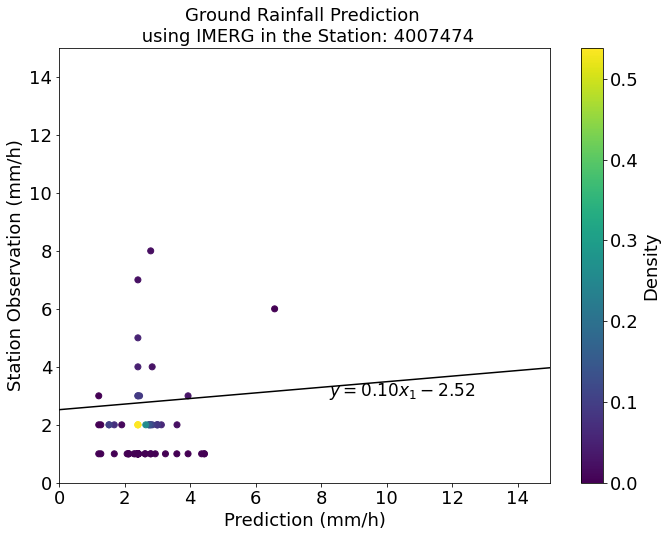

In [69]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

In [70]:
rmse_case1_all.append(rmse_case1.mean())
rmse_case2_all.append(rmse_case2.mean())
zero_count_ratio.append(zero_count)

## 9. 4009460 Station Random Forest 분석

### Case-1 적용 RF

In [71]:
st_code = "4009460"
x_col = st_code + "_gpm"
y_col = st_code

In [72]:
rf = RandomForestRegressor(n_estimators=est_jan, random_state=2, n_jobs=-1)
X_val = raw_hourly_df[[x_col]]
y_val = raw_hourly_df[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([-0.231839  , -0.48385574, -0.25251558, -0.53400992, -0.32985477,
       -0.24933088, -0.26370323, -0.23141786, -0.24858618, -0.29840261,
       -0.42196854, -0.65408838, -0.27553894, -0.34585912, -0.54355195,
       -0.37745228, -0.33763374, -0.32229457, -0.51505156, -0.35108011])

In [73]:
rmse_case1 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case1, 3))
print('RMSE 평균: %0.3f' % (rmse_case1.mean()))

RMSE: [0.481 0.696 0.503 0.731 0.574 0.499 0.514 0.481 0.499 0.546 0.65  0.809
 0.525 0.588 0.737 0.614 0.581 0.568 0.718 0.593]
RMSE 평균: 0.595


/tmp/ipykernel_12096/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_12096/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


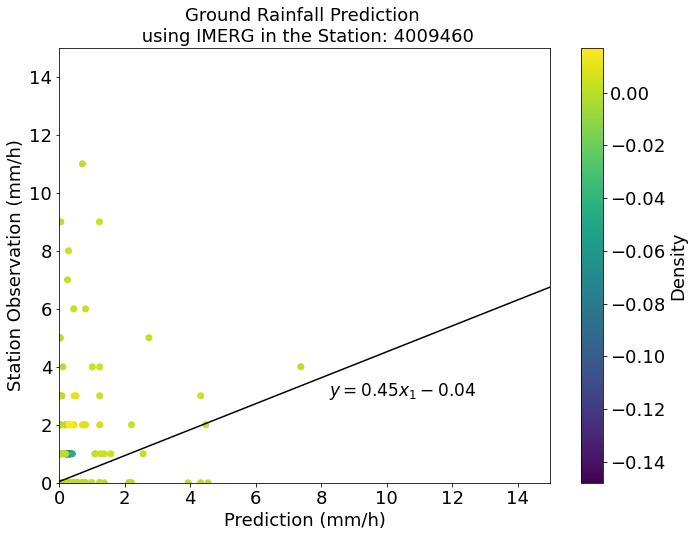

In [74]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

### Case-2 적용 RF

In [75]:
raw_hourly_df_new = raw_hourly_df[raw_hourly_df[y_col].loc[:]!=0].dropna()
zero_count = (len(raw_hourly_df) - len(raw_hourly_df_new))/len(raw_hourly_df)*100
X_val = raw_hourly_df_new[[x_col]]
y_val = raw_hourly_df_new[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([-6.85268055, -4.40707846, -6.33474421, -7.58986424, -1.66253365,
       -6.81277945, -9.95881184, -5.04833908, -3.48573369, -3.83968907,
       -7.04532007, -2.37682081, -2.91804227, -7.08685159, -6.36549748,
       -6.77388666, -3.34844948, -9.76163379, -3.92917387, -2.55094683])

In [76]:
rmse_case2 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case2, 3))
print('RMSE 평균: %0.3f' % (rmse_case2.mean()))
print('제거된 0의 비율: %0.3f' % (zero_count))

RMSE: [2.618 2.099 2.517 2.755 1.289 2.61  3.156 2.247 1.867 1.96  2.654 1.542
 1.708 2.662 2.523 2.603 1.83  3.124 1.982 1.597]
RMSE 평균: 2.267
제거된 0의 비율: 94.950


/tmp/ipykernel_12096/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_12096/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


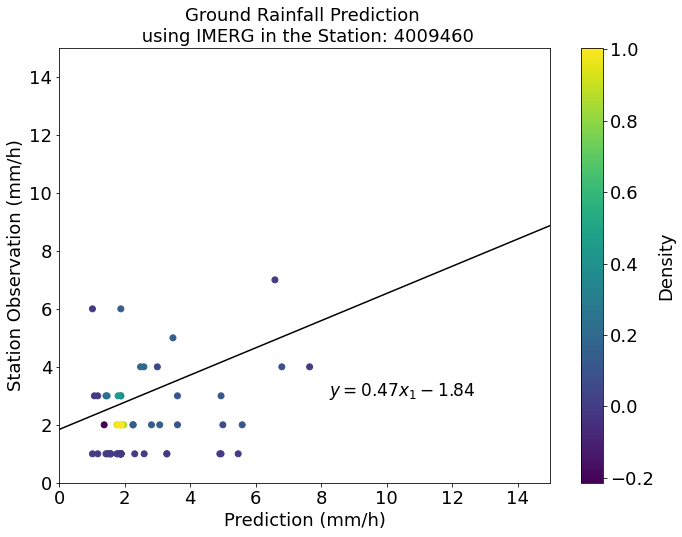

In [77]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

In [78]:
rmse_case1_all.append(rmse_case1.mean())
rmse_case2_all.append(rmse_case2.mean())
zero_count_ratio.append(zero_count)

## 10. 9000140 Station Random Forest 분석

### Case-1 적용 RF

In [79]:
st_code = "9000140"
x_col = st_code + "_gpm"
y_col = st_code

In [80]:
rf = RandomForestRegressor(n_estimators=est_jan, random_state=2, n_jobs=-1)
X_val = raw_hourly_df[[x_col]]
y_val = raw_hourly_df[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([-0.42390633, -0.37924149, -0.37233531, -1.27860737, -0.46646152,
       -0.47219381, -0.38849054, -0.39812758, -0.41712721, -0.88417099,
       -0.38887191, -0.61760879, -0.05417541, -0.28962277, -0.66802701,
       -0.17788479, -0.74455463, -0.31437897, -0.36992429, -0.47835117])

In [81]:
rmse_case1 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case1, 3))
print('RMSE 평균: %0.3f' % (rmse_case1.mean()))

RMSE: [0.651 0.616 0.61  1.131 0.683 0.687 0.623 0.631 0.646 0.94  0.624 0.786
 0.233 0.538 0.817 0.422 0.863 0.561 0.608 0.692]
RMSE 평균: 0.668


/tmp/ipykernel_12096/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_12096/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


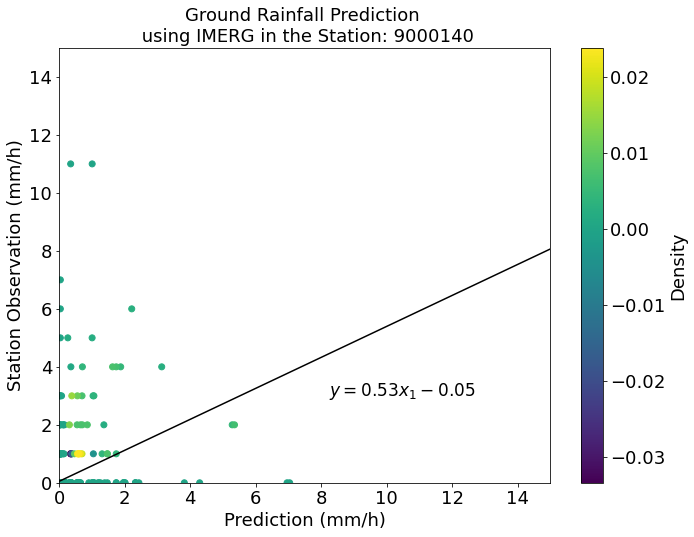

In [82]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

### Case-2 적용 RF

In [83]:
raw_hourly_df_new = raw_hourly_df[raw_hourly_df[y_col].loc[:]!=0].dropna()
zero_count = (len(raw_hourly_df) - len(raw_hourly_df_new))/len(raw_hourly_df)*100
X_val = raw_hourly_df_new[[x_col]]
y_val = raw_hourly_df_new[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([ -8.41452799,  -4.91172072, -22.49011543,  -2.95364104,
        -1.17156394,  -2.89170868, -11.76564622,  -1.86461478,
        -2.31770283,  -0.90113103,  -7.53331965, -13.95005534,
        -0.52494745,  -4.65818871,  -6.33882173,  -6.76782384,
        -1.58991344,  -2.87277966, -10.19801449, -12.31088093])

In [84]:
rmse_case2 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case2, 3))
print('RMSE 평균: %0.3f' % (rmse_case2.mean()))
print('제거된 0의 비율: %0.3f' % (zero_count))

RMSE: [2.901 2.216 4.742 1.719 1.082 1.701 3.43  1.366 1.522 0.949 2.745 3.735
 0.725 2.158 2.518 2.602 1.261 1.695 3.193 3.509]
RMSE 평균: 2.288
제거된 0의 비율: 94.912


/tmp/ipykernel_12096/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_12096/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


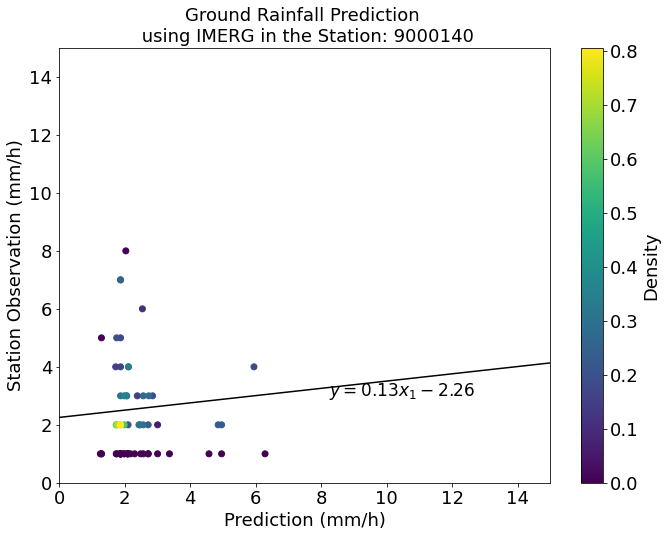

In [85]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

In [86]:
rmse_case1_all.append(rmse_case1.mean())
rmse_case2_all.append(rmse_case2.mean())
zero_count_ratio.append(zero_count)

## 11. 9000233 Station Random Forest 분석

### Case-1 적용 RF

In [87]:
st_code = "9000233"
x_col = st_code + "_gpm"
y_col = st_code

In [88]:
rf = RandomForestRegressor(n_estimators=est_jan, random_state=2, n_jobs=-1)
X_val = raw_hourly_df[[x_col]]
y_val = raw_hourly_df[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([-0.91046313, -0.35947087, -0.61859845, -0.91306333, -0.76164322,
       -0.65154096, -0.11011889, -0.53885046, -0.26871134, -0.21909032,
       -0.92286327, -0.60878462, -0.24632746, -1.17260427, -1.10437432,
       -0.47542699, -1.0601117 , -0.51275432, -0.40650953, -0.56870859])

In [89]:
rmse_case1 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case1, 3))
print('RMSE 평균: %0.3f' % (rmse_case1.mean()))

RMSE: [0.954 0.6   0.787 0.956 0.873 0.807 0.332 0.734 0.518 0.468 0.961 0.78
 0.496 1.083 1.051 0.69  1.03  0.716 0.638 0.754]
RMSE 평균: 0.761


/tmp/ipykernel_12096/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_12096/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


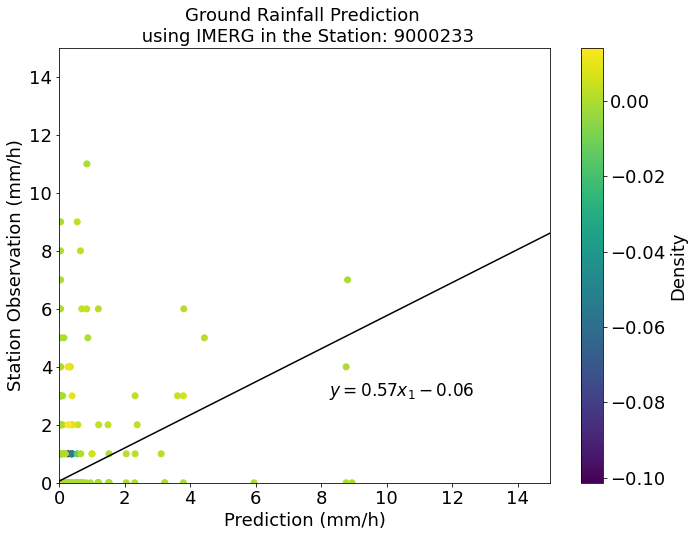

In [90]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

### Case-2 적용 RF

In [91]:
raw_hourly_df_new = raw_hourly_df[raw_hourly_df[y_col].loc[:]!=0].dropna()
zero_count = (len(raw_hourly_df) - len(raw_hourly_df_new))/len(raw_hourly_df)*100
X_val = raw_hourly_df_new[[x_col]]
y_val = raw_hourly_df_new[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([ -7.28902212,  -9.70837657,  -6.36067823,  -6.49628879,
        -3.90028731,  -3.80951853,  -3.33999822,  -5.00228756,
        -8.9761858 ,  -8.80446789, -13.52001918, -13.18947525,
       -10.97956063,  -1.75019643,  -7.64963279,  -7.43354049,
        -8.79168546,  -3.97905045,  -6.28760702, -11.29421588])

In [92]:
rmse_case2 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case2, 3))
print('RMSE 평균: %0.3f' % (rmse_case2.mean()))
print('제거된 0의 비율: %0.3f' % (zero_count))

RMSE: [2.7   3.116 2.522 2.549 1.975 1.952 1.828 2.237 2.996 2.967 3.677 3.632
 3.314 1.323 2.766 2.726 2.965 1.995 2.508 3.361]
RMSE 평균: 2.655
제거된 0의 비율: 94.470


/tmp/ipykernel_12096/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_12096/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


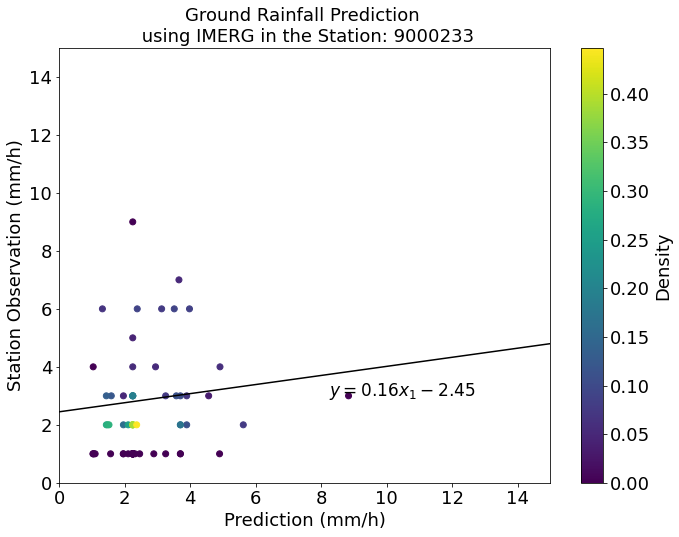

In [93]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

In [94]:
rmse_case1_all.append(rmse_case1.mean())
rmse_case2_all.append(rmse_case2.mean())
zero_count_ratio.append(zero_count)

## 12. 9000234 Station Random Forest 분석

### Case-1 적용 RF

In [95]:
st_code = "9000234"
x_col = st_code + "_gpm"
y_col = st_code

In [96]:
rf = RandomForestRegressor(n_estimators=est_jan, random_state=2, n_jobs=-1)
X_val = raw_hourly_df[[x_col]]
y_val = raw_hourly_df[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([-0.33161731, -1.32538773, -1.63634427, -0.72827091, -0.07631367,
       -0.66925892, -0.25477811, -0.34417152, -0.78524071, -0.6624592 ,
       -1.60137541, -0.53061184, -0.74293847, -1.0497399 , -1.5433001 ,
       -1.38390404, -0.74650166, -2.47748882, -2.3291039 , -1.2523719 ])

In [97]:
rmse_case1 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case1, 3))
print('RMSE 평균: %0.3f' % (rmse_case1.mean()))

RMSE: [0.576 1.151 1.279 0.853 0.276 0.818 0.505 0.587 0.886 0.814 1.265 0.728
 0.862 1.025 1.242 1.176 0.864 1.574 1.526 1.119]
RMSE 평균: 0.956


/tmp/ipykernel_12096/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_12096/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


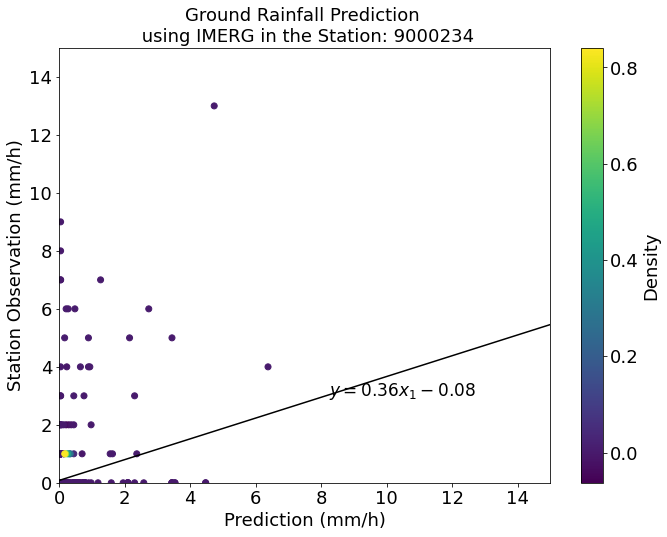

In [98]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

### Case-2 적용 RF

In [99]:
raw_hourly_df_new = raw_hourly_df[raw_hourly_df[y_col].loc[:]!=0].dropna()
zero_count = (len(raw_hourly_df) - len(raw_hourly_df_new))/len(raw_hourly_df)*100
X_val = raw_hourly_df_new[[x_col]]
y_val = raw_hourly_df_new[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([ -4.16999503, -21.10899343,  -2.10331368,  -4.46456321,
        -9.51272176,  -7.88998332,  -2.53145724,  -8.91827717,
       -23.62215083, -29.99013293,  -4.64018803, -14.28564529,
        -1.81156006,  -4.40232346, -40.90576286, -18.45632904,
       -42.46940076, -47.8798606 ,  -3.69844166, -48.96196146])

In [100]:
rmse_case2 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case2, 3))
print('RMSE 평균: %0.3f' % (rmse_case2.mean()))
print('제거된 0의 비율: %0.3f' % (zero_count))

RMSE: [2.042 4.594 1.45  2.113 3.084 2.809 1.591 2.986 4.86  5.476 2.154 3.78
 1.346 2.098 6.396 4.296 6.517 6.92  1.923 6.997]
RMSE 평균: 3.672
제거된 0의 비율: 95.046


/tmp/ipykernel_12096/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_12096/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


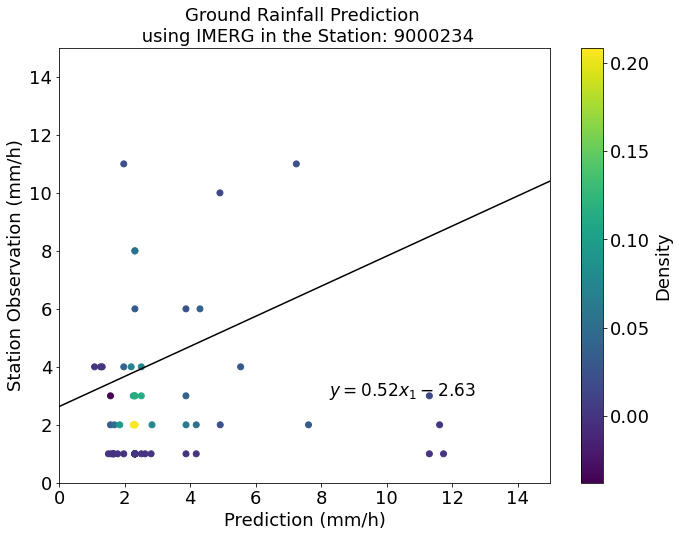

In [101]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

In [102]:
rmse_case1_all.append(rmse_case1.mean())
rmse_case2_all.append(rmse_case2.mean())
zero_count_ratio.append(zero_count)

In [103]:
rmse_case1_all

[0.5347076167478587,
 0.5194582347154816,
 0.7152376030499259,
 0.4951770920608262,
 0.698440603588739,
 0.6412690053822302,
 0.6140986410456771,
 0.8136692422355456,
 0.5952704291635627,
 0.6680662929603723,
 0.7612966669768316,
 0.9563914793643326]

In [104]:
rmse_case2_all

[1.908184786215975,
 1.6250757791319788,
 2.5477916464629637,
 1.7661900328431674,
 2.1856429367400567,
 2.4312120120848304,
 1.8763243699594334,
 2.785906696405343,
 2.2671604159049172,
 2.288392639076236,
 2.6553023211017033,
 3.6716707366717953]

In [105]:
zero_count_ratio

[95.2188940092166,
 94.98847926267281,
 94.60445468509985,
 95.46850998463901,
 94.79646697388633,
 95.12288786482334,
 94.98847926267281,
 94.89247311827957,
 94.95007680491551,
 94.91167434715821,
 94.47004608294931,
 95.04608294930875]

In [108]:
import pandas as pd
 
data = {'CASE_1_RMSE': pd.Series(rmse_case1_all,
                       index=raw_hourly_df.columns[1:13].values),
        'CASE_2_RMSE': pd.Series(rmse_case2_all,
                       index=raw_hourly_df.columns[1:13].values),
        'Zero_Ratio(%)': pd.Series(zero_count_ratio,
                       index=raw_hourly_df.columns[1:13].values)}

df = pd.DataFrame(data)
 
# Print the data
df.to_csv("rf_5월.csv")
df

,CASE_1_RMSE,CASE_2_RMSE,Zero_Ratio(%)
4001430,0.534708,1.908185,95.218894
4001440,0.519458,1.625076,94.988479
4001450,0.715238,2.547792,94.604455
4003420,0.495177,1.766190,95.468510
4007450,0.698441,2.185643,94.796467
4007470,0.641269,2.431212,95.122888
4007472,0.614099,1.876324,94.988479
4007474,0.813669,2.785907,94.892473
4009460,0.595270,2.267160,94.950077
9000140,0.668066,2.288393,94.911674
